In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt



"""
Preparation of data 
Here the stock data of perticular day is being prepared. 
What were the numbers before few days and what are the moving averate numbers and the total traded value etc.  
In next step, assign future day values for the y to be predicted. 
Before final use the data needs to be truncated to avoid nan values in MA200 etc  and the future days also. 
Future days whatever the days you skipped needs to be kept  outside before training and testing. 
You can get output for them once you fully satisfied.
"""

def getMAs(subDB,masamplings,ColNameOn):
    for i in masamplings:
        colname='MA'+str(i)
        subDB[colname]=subDB[ColNameOn].rolling(window=i).mean()
    return subDB


def prepareDataWithLast(subDB,masamplings,nOfDays,ColNamesOn):    
    subDB=getMAs(subDB,masamplings,ColNamesOn[0])
    dataDB=subDB.copy()
    dataDB=dataDB.drop(dataDB.index[0:nOfDays])
    for i in range(0,nOfDays):
        for cn in ColNamesOn:
            dataDB[cn+str(nOfDays-i)+'DaysBack']=subDB[cn][i:-(nOfDays-i)].tolist()        
    return dataDB

def predictionScore(nOfDays,daysOfAdvPred):
    masamplings=[5,10,20,30,50,75,100,150,200]
    # nOfDays=5
    ColNamesOn=["CLOSE","TOTTRDQTY"] # [primary , secondary]
    myDataDB=prepareDataWithLast(subDB, masamplings,nOfDays,ColNamesOn)
    # len(myDataDB)
    """
    Drop data from either ends
    Need to drop the rows upto where MA200 starts having actual value.
    And Drop future days where you dont have the value. Put in X and y
    """
    # daysOfAdvPred=10
    y_d = myDataDB[["TIMESTAMP",ColNamesOn[0]]][daysOfAdvPred:]
    X_d=myDataDB.drop(myDataDB.index[-daysOfAdvPred:])
    Req_d=myDataDB.drop(myDataDB.index[:-daysOfAdvPred])
    if(nOfDays<masamplings[-1]):
        X=X_d.drop(X_d.index[0:masamplings[-1]-nOfDays-1])
        y=y_d.drop(y_d.index[0:masamplings[-1]-nOfDays-1])
    else:
        X=X_d
        y=y_d
    X=X.drop('TIMESTAMP',axis=1)
    y=y.drop('TIMESTAMP',axis=1)
    R=Req_d.drop('TIMESTAMP',axis=1)
    #Training and prediction
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    regressor = LinearRegression()
    # regressor = KNeighborsRegressor(n_neighbors=1)
    # kneighbor_regression.fit(X_train, y_train)
    regressor.fit(X_train, y_train)
    y_pred_test = regressor.predict(X_test)
    yR_pred = regressor.predict(R)
    yy=100*(y_test-y_pred_test)/y_test
    #Score calculation
    yR = [x for sublist in yR_pred for x in sublist]
#     print(yR)
    tstamp=datetime.strptime(subDB['TIMESTAMP'].iloc[-1],'%Y-%m-%d')
    # ordinal_time=tstamp.toordinal()+
    d = []
    for dt in np.array(range(0,len(yR)))+tstamp.toordinal()+1:
        d.append( datetime.fromordinal(dt))
    yPred=pd.DataFrame({"TIMESTAMP":d,ColNamesOn[0]:yR})
#     yypow=yy*yy
#     print(yPred)
    # return (sum(yypow['CLOSE'])- max(yypow['CLOSE']))/len(yypow['CLOSE'])
    return yPred

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [2]:
abb=pd.read_csv("abb.csv")

subDB=abb[['TIMESTAMP','OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST','TOTTRDQTY']]
# subDB[-110:-102]
res4init=215;
initTest=subDB[-res4init:]
subDB=subDB[:-res4init]

dataDB=[]

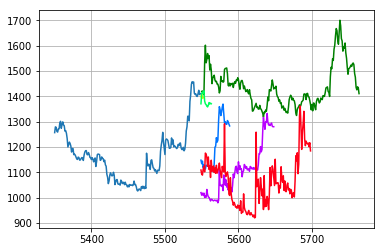

pausing at 5


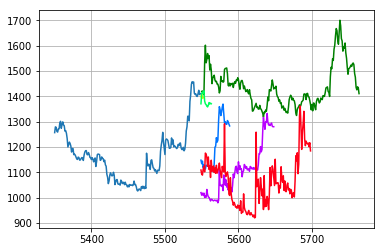

In [ ]:
from IPython import display
import time
import pylab as pl
# backdatafor=[5,20,40,80]

advDays2pred=[5,15,40,100,150]
backdatafor=[10]

# advDays2pred=[10]

score=[]
scoreval=[]
past_vals2plot=200
# fig = plt.figure()
# ax = fig.add_subplot(111)

pl.plot(subDB.CLOSE[-past_vals2plot:])
pl.plot(initTest.CLOSE,'g')


# ax.set_xlim([0.5, 4.5])
# ax.set_ylim([-2, 8])
ax.set_title('ABB')
ax.set_ylabel('Value')
ax.set_xlabel('Date')

# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
pl.grid(True)

i=0
cmap = get_cmap(6)
# display.clear_output(wait=True)
# display.display(pl.gcf())

for nBackDays in backdatafor:
    for advDays in advDays2pred:
        i +=1
        # predscore=int(np.sqrt(predictionScore(nBackDays,advDays)))
        yp=predictionScore(nBackDays,advDays)           
        indx=np.array(range(0,len(yp)))+subDB.index[-1]        
        pl.plot(indx,yp.CLOSE.tolist(),c=cmap(i))
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)
#         plt.ion()
#         plt.show()
#         plt.pause(2)
        print("pausing at {}".format(i))
        
        # yp
while True:
    plt.pause(0.05)